In [22]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [23]:
train = pd.read_csv("train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
train.shape

(891, 12)

In [25]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [26]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [28]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

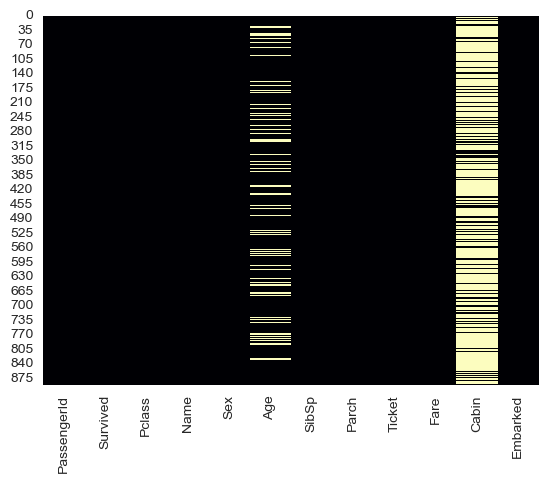

In [29]:
sns.heatmap(train.isnull(), cmap='magma',cbar=False)

In [30]:
sur = train['Survived'].value_counts()
survival_rate = [sur[0]/len(train)*100, sur[1]/len(train)*100]

In [31]:
sns.set_style('whitegrid')

<Axes: xlabel='Survived', ylabel='count'>

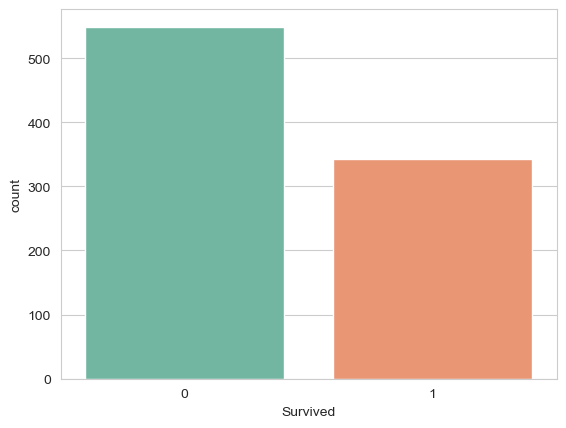

In [32]:
sns.countplot(data=train, x = 'Survived', palette='Set2')

<Axes: xlabel='Pclass', ylabel='count'>

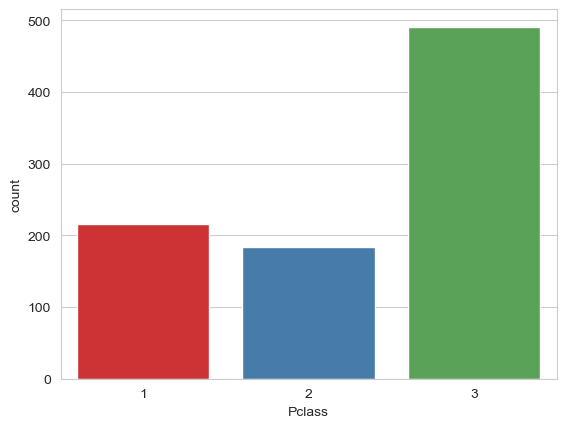

In [33]:
sns.countplot(data=train, x = 'Pclass', palette='Set1')

<Axes: xlabel='Pclass', ylabel='count'>

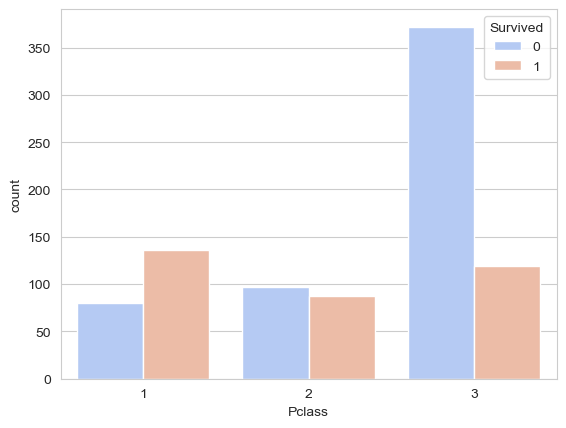

In [34]:
sns.countplot(data=train, x='Pclass', hue='Survived', palette='coolwarm')

<Axes: xlabel='Age', ylabel='Count'>

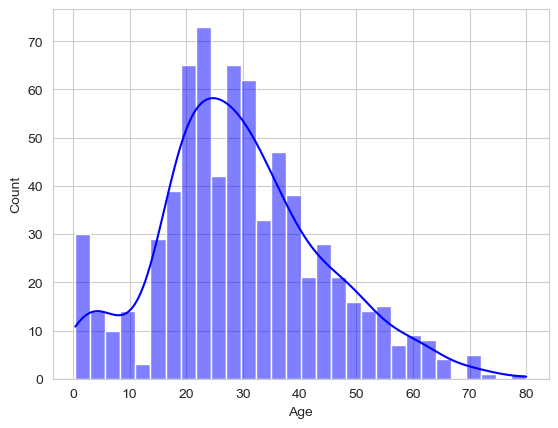

In [35]:
sns.histplot(data=train, x = 'Age', bins=30, kde=True, color='blue')

<Axes: xlabel='Sex', ylabel='count'>

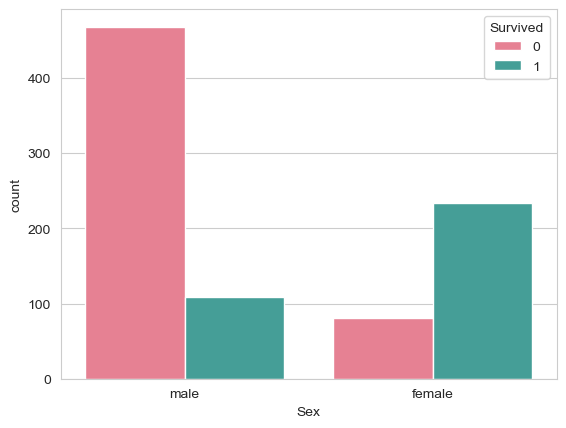

In [36]:
sns.countplot(data=train, x='Sex', hue='Survived', palette='husl')

In [37]:
train['Age'].mode()

0    24.0
Name: Age, dtype: float64

In [38]:
train['Age'].median()

28.0

In [39]:
train['Age'].mean()

29.69911764705882

In [40]:
train['Age'] = train['Age'].fillna(train['Age'].median())
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

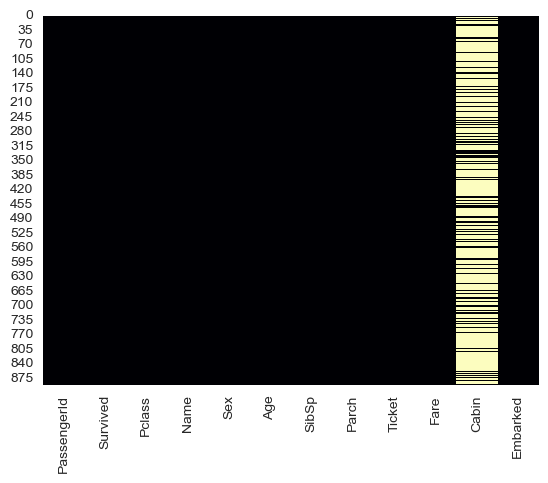

In [41]:
sns.heatmap(train.isnull(),cmap='magma', cbar=False)

<Axes: xlabel='Age', ylabel='Fare'>

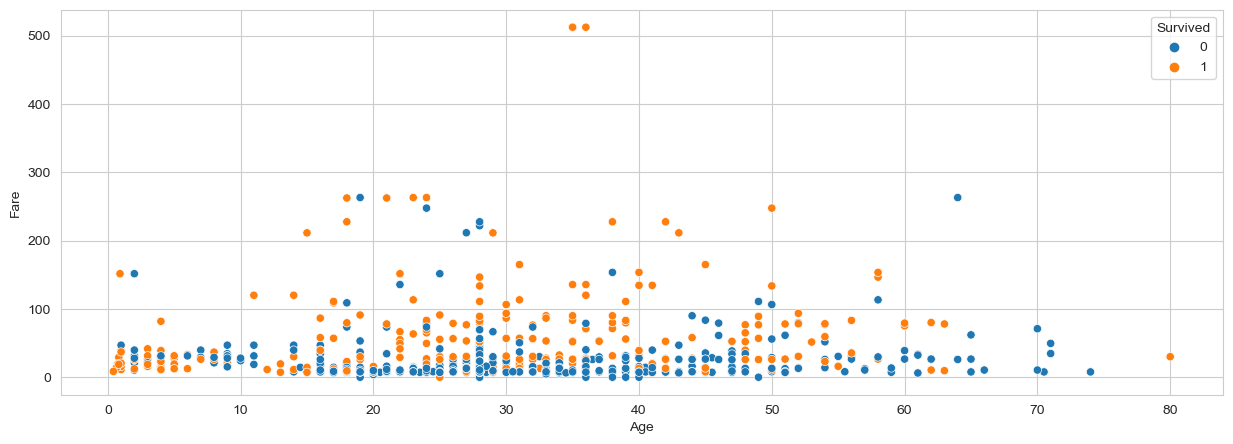

In [42]:
plt.subplots(figsize=(15,5))
sns.scatterplot(x = 'Age', y='Fare', data=train, hue='Survived')

In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [44]:
train['Name']=  le.fit_transform(train['Name'])
encoded_values = train['Name'].unique()
decodec_values = le.inverse_transform(encoded_values)

In [45]:
train['Name'] = le.fit_transform(train['Name'])
train['Sex'] = le.fit_transform(train['Sex'])
embarked = {0:'S', 1:'C', 2:'Q'}
train['Embarked'] = train['Embarked'].fillna('Q')
train['Embarked'] = le.fit_transform(train['Embarked'])

/var/folders/vy/bpb645w940104xm12cdmq4b80000gn/T/ipykernel_95098/3376004506.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), cmap='RdBu', cbar=True, annot=True)


<Axes: >

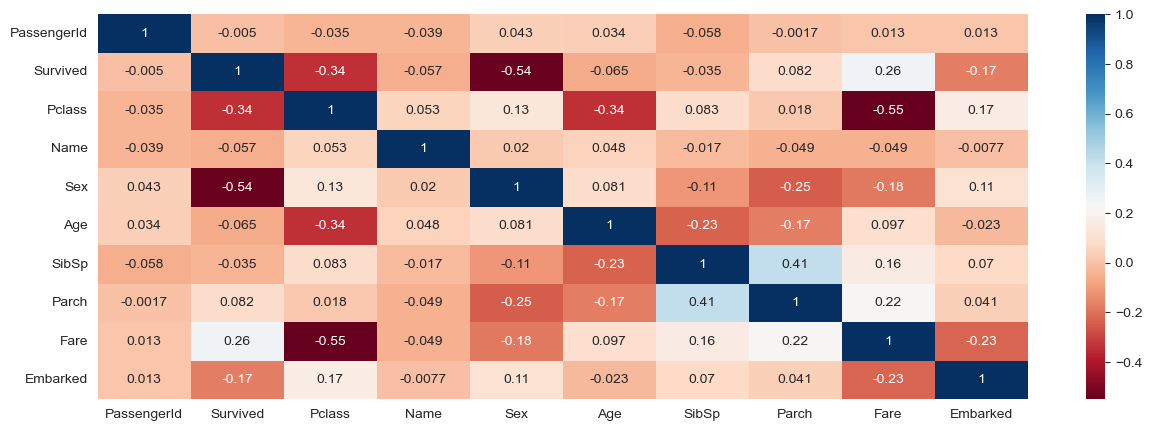

In [46]:
plt.subplots(figsize=(15,5))
sns.heatmap(train.corr(), cmap='RdBu', cbar=True, annot=True)

In [47]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,190,0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,353,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,272,0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,15,1,35.0,0,0,373450,8.0500,NaN,2


In [48]:
train = train.drop(columns=['PassengerId', 'Ticket', 'Cabin'])
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,108,1,22.0,1,0,7.2500,2
1,1,1,190,0,38.0,1,0,71.2833,0
2,1,3,353,0,26.0,0,0,7.9250,2
3,1,1,272,0,35.0,1,0,53.1000,2
4,0,3,15,1,35.0,0,0,8.0500,2


In [49]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [50]:
features = train.iloc[:,1:]
target = train.iloc[:,0]

In [52]:
best_features = SelectKBest(score_func=chi2, k=8)
fit = best_features.fit(features,target)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(features.columns)

featureScores = pd.concat([dfcolumns,dfscores], axis=1)
featureScores.columns = ['Column', 'Score']
print(featureScores.nlargest(8,'Score'))

     Column        Score
6      Fare  4518.319091
1      Name   435.568915
2       Sex    92.702447
0    Pclass    30.873699
3       Age    21.649163
7  Embarked    10.660296
5     Parch    10.097499
4     SibSp     2.581865


In [53]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,108,1,22.0,1,0,7.2500,2
1,1,1,190,0,38.0,1,0,71.2833,0
2,1,3,353,0,26.0,0,0,7.9250,2
3,1,1,272,0,35.0,1,0,53.1000,2
4,0,3,15,1,35.0,0,0,8.0500,2


In [54]:
train = train.drop(columns=['Embarked', 'SibSp', 'Parch'])
train.head()

,Survived,Pclass,Name,Sex,Age,Fare
0,0,3,108,1,22.0,7.2500
1,1,1,190,0,38.0,71.2833
2,1,3,353,0,26.0,7.9250
3,1,1,272,0,35.0,53.1000
4,0,3,15,1,35.0,8.0500


In [55]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
features = train[['Pclass', 'Sex', 'Name', 'Fare']].values
features = sc.fit_transform(features)
target = train['Survived'].values

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=2)

In [57]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score

In [58]:
def model(classifier):
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    print("Accuracy: ", accuracy_score(y_test, pred))
    print("Roc Auc Score: ", roc_auc_score(y_test, pred))
    print('Cross Validation Score:', cross_val_score(classifier, X_train, y_train, cv=10, scoring='accuracy').mean())

In [59]:
from sklearn.metrics import confusion_matrix

In [69]:
def model_evaluation(classifier):
    cm = confusion_matrix(y_test, classifier.predict(X_test))
    names = ['True Neg', 'False Pos', 'Flase Neg', 'True Pos']
    counts = [value for value in cm.flatten()]
    percentage = [value for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentage)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm, annot=labels, cmap='Blues', fmt='')
    tn,fp,fn,tp = cm.flatten()
    print('Precession: ', tp/(tp+fp))
    print('Recall: ', tp/(tp+fn))

In [61]:
from sklearn.model_selection import GridSearchCV
def grid_search(classifier, hyperparameters):
    GSCV = GridSearchCV(classifier, hyperparameters, cv=10)
    model = GSCV.fit(X_test, y_test)
    print(model)
    print("Highest Accuracy: ", model.best_score_)
    print('Best Parameters: ', model.best_params_)

# Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state=0, C=10, penalty='l2')

In [63]:
model(classifier_lr)

Accuracy:  0.7713004484304933
Roc Auc Score:  0.7503318951211417
Cross Validation Score: 0.7888738127544098


Precession:  0.7733333333333333
Recall:  0.6304347826086957


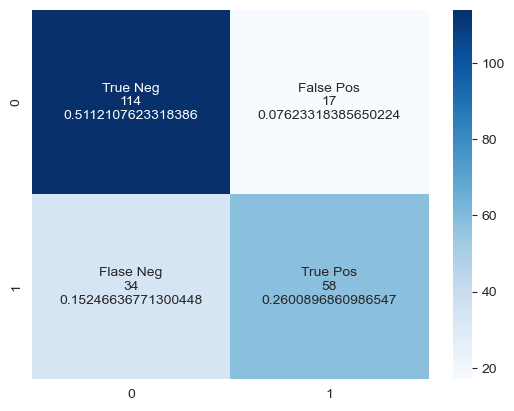

In [70]:
model_evaluation(classifier_lr)

# SVM

In [72]:
from sklearn.svm import SVC

In [73]:
classifier_svc = SVC(kernel='linear', C=0.1)

In [74]:
hyperparameters = {'C':[0.01,0.1,1,10,100]}
grid_search(classifier_svc, hyperparameters)

GridSearchCV(cv=10, estimator=SVC(C=0.1, kernel='linear'),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]})
Highest Accuracy:  0.7715415019762846
Best Parameters:  {'C': 0.1}


In [75]:
model(classifier_svc)

Accuracy:  0.7713004484304933
Roc Auc Score:  0.7503318951211417
Cross Validation Score: 0.7918588873812753


Precession:  0.7733333333333333
Recall:  0.6304347826086957


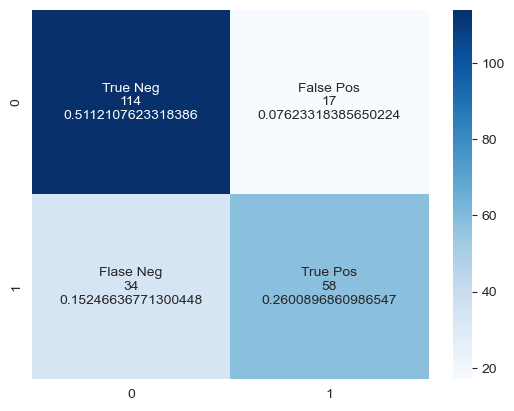

In [76]:
model_evaluation(classifier_svc)

# Decision Tree

In [77]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(criterion='entropy')

In [78]:
model(classifier_dt)

Accuracy:  0.7713004484304933
Roc Auc Score:  0.7568038499834052
Cross Validation Score: 0.7769335142469471


Precession:  0.7469879518072289
Recall:  0.6739130434782609


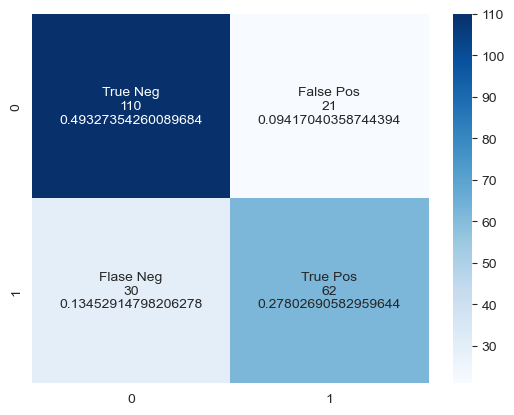

In [79]:
model_evaluation(classifier_dt)

# Random Forest

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
classifier_rf = RandomForestClassifier(max_depth=2, random_state=0)

In [82]:
model(classifier_rf)

Accuracy:  0.7399103139013453
Roc Auc Score:  0.7041984732824428
Cross Validation Score: 0.7814111261872456


Precession:  0.7931034482758621
Recall:  0.5


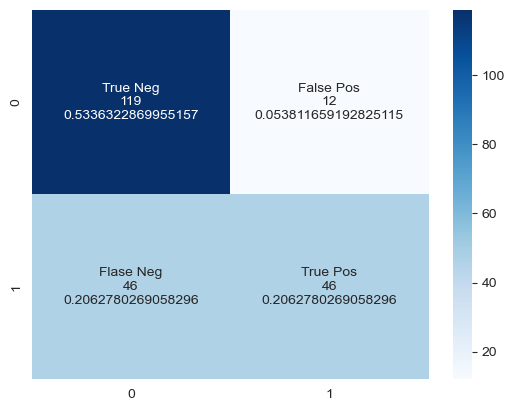

In [83]:
model_evaluation(classifier_rf)

# KNN

In [84]:
from sklearn.neighbors import KNeighborsClassifier

In [85]:
classifier_knn = KNeighborsClassifier(leaf_size=7, n_neighbors=3, p=1)

In [86]:
leaf_size = list(range(1,50))
n_neighbors= list(range(1,30))
p=[1,2]
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
grid_search(classifier_knn,hyperparameters)

GridSearchCV(cv=10,
             estimator=KNeighborsClassifier(leaf_size=7, n_neighbors=3, p=1),
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'p': [1, 2]})
Highest Accuracy:  0.8209486166007907
Best Parameters:  {'leaf_size': 1, 'n_neighbors': 15, 'p': 1}


In [87]:
model(classifier_knn)

Accuracy:  0.7533632286995515
Roc Auc Score:  0.7269747759707933
Cross Validation Score: 0.7650610583446403


Precession:  0.7681159420289855
Recall:  0.5760869565217391


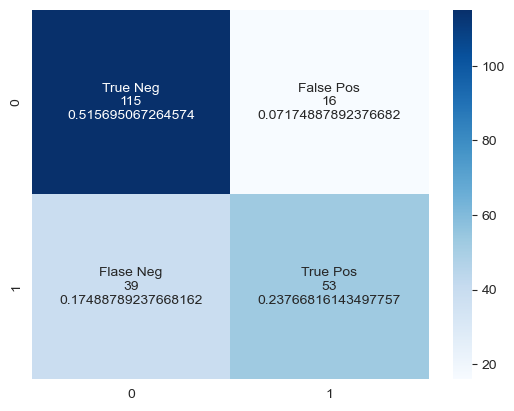

In [88]:
model_evaluation(classifier_knn)

In [89]:
models = {'Models':['LogisticRegression', 'Support Vector Machines', 'DecisionTreeClassifier', 'RandomForestClassifier', 'KNeighborsClassifier'],
          'Cross Val Score':[0.7888738127544098, 0.7918588873812753, 0.7769335142469471, 0.7814111261872456, 0.7650610583446403]}


In [90]:
cross_val = pd.DataFrame(models)

In [91]:
cross_val

,Models,Cross Val Score
0,LogisticRegression,0.788874
1,Support Vector Machines,0.791859
2,DecisionTreeClassifier,0.776934
3,RandomForestClassifier,0.781411
4,KNeighborsClassifier,0.765061
